In [2]:
import lifelines
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [11]:
np.random.seed(42)

durations = np.random.exponential(scale=40, size=10).astype(int)

In [14]:
durations = pd.DataFrame(durations, columns=['duration']).sort_values('duration')

In [15]:
durations

,duration
6,2
4,6
5,6
0,18
3,36
8,36
9,49
2,52
7,80
1,120


In [22]:
durations['rank'] = durations['duration'].rank(method='dense')

In [25]:
durations['num_censored_at_ti'] = durations['duration'].apply(lambda x:(durations['duration'] > x).sum())

In [34]:
durations['num_events'] = durations.groupby('duration').duration.transform(len)

In [35]:
durations

,duration,rank,num_censored_at_ti,num_events
6,2,1.0,9,1
4,6,2.0,7,2
5,6,2.0,7,2
0,18,3.0,6,1
3,36,4.0,4,2
8,36,4.0,4,2
9,49,5.0,3,1
2,52,6.0,2,1
7,80,7.0,1,1
1,120,8.0,0,1


In [39]:
durations['factor'] = (1 - durations.num_events / (durations.num_censored_at_ti + durations.num_events))

In [40]:
durations

,duration,rank,num_censored_at_ti,num_events,factor
6,2,1.0,9,1,0.900000
4,6,2.0,7,2,0.777778
5,6,2.0,7,2,0.777778
0,18,3.0,6,1,0.857143
3,36,4.0,4,2,0.666667
8,36,4.0,4,2,0.666667
9,49,5.0,3,1,0.750000
2,52,6.0,2,1,0.666667
7,80,7.0,1,1,0.500000
1,120,8.0,0,1,0.000000


In [47]:
duration_series = durations.groupby('duration').factor.first()

In [48]:
duration_series

duration
2      0.900000
6      0.777778
18     0.857143
36     0.666667
49     0.750000
52     0.666667
80     0.500000
120    0.000000
Name: factor, dtype: float64

In [49]:
duration_series.cumprod()

duration
2      0.9
6      0.7
18     0.6
36     0.4
49     0.3
52     0.2
80     0.1
120    0.0
Name: factor, dtype: float64

In [52]:
kmf = lifelines.KaplanMeierFitter()
kmf.fit(durations=durations.duration)

<lifelines.KaplanMeierFitter: fitted with 10 observations, 0 censored>

array([  0.,   2.,   6.,  18.,  36.,  49.,  52.,  80., 120.])

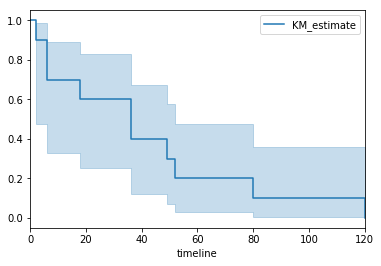

In [56]:
kmf.plot()